In [1]:
### Analiza danych

In [3]:
import pandas as pd
penguins = pd.read_csv('penguins.csv')
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [9]:
pd.Series(penguins["Species"]).value_counts()

Species
0    152
1    124
2     68
Name: count, dtype: int64

In [11]:
pd.Series(penguins["Species"]).value_counts(normalize=True)

Species
0    0.441860
1    0.360465
2    0.197674
Name: proportion, dtype: float64

In [13]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


In [15]:
row_null = penguins[penguins['CulmenLength'].isnull()]
print(row_null)

     CulmenLength  CulmenDepth  FlipperLength  BodyMass  Species
3             NaN          NaN            NaN       NaN        0
271           NaN          NaN            NaN       NaN        1


In [17]:
penguins = penguins[penguins.isnull().sum(axis=1) < 2]
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        342 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 16.0 KB


In [19]:
features = ['CulmenLength',	'CulmenDepth', 'FlipperLength', 'BodyMass']
target = 'Species'
X, y = penguins[features], penguins[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,CulmenLength,CulmenDepth,FlipperLength,BodyMass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0



y:


0      0
1      0
2      0
4      0
5      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: Species, Length: 342, dtype: int64

In [21]:
y.describe()

count    342.000000
mean       0.757310
std        0.763648
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: Species, dtype: float64

In [23]:
X.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [25]:
### Wizualizacje danych

Unique values: 164


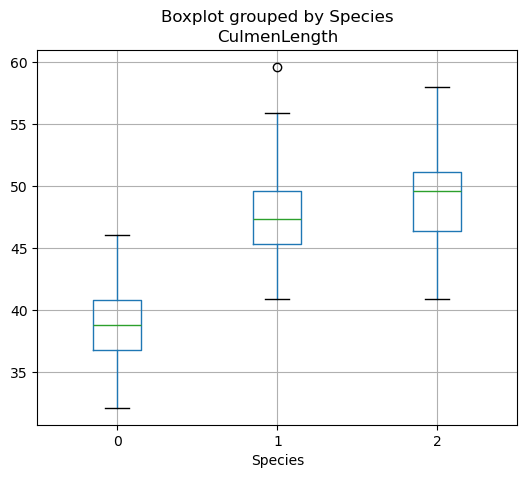

Unique values: 80


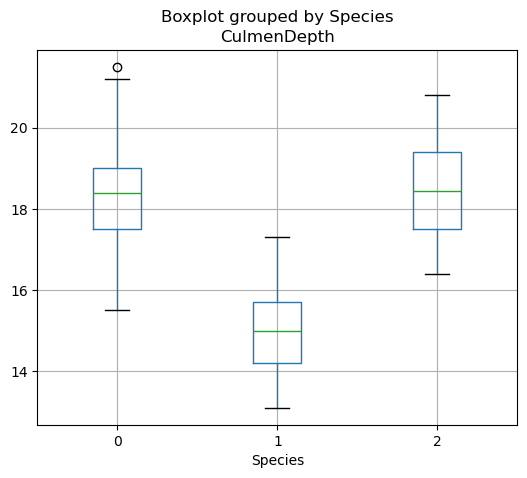

Unique values: 55


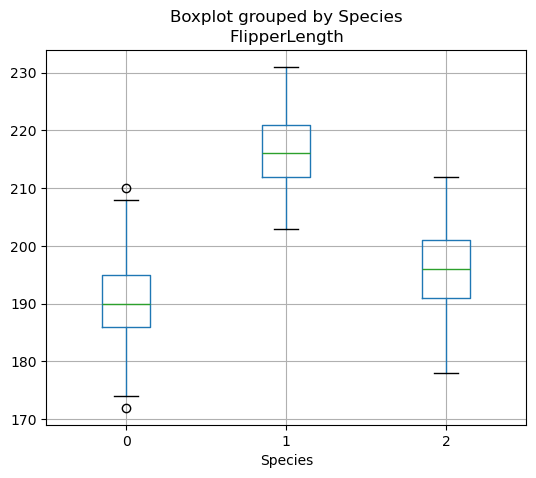

Unique values: 94


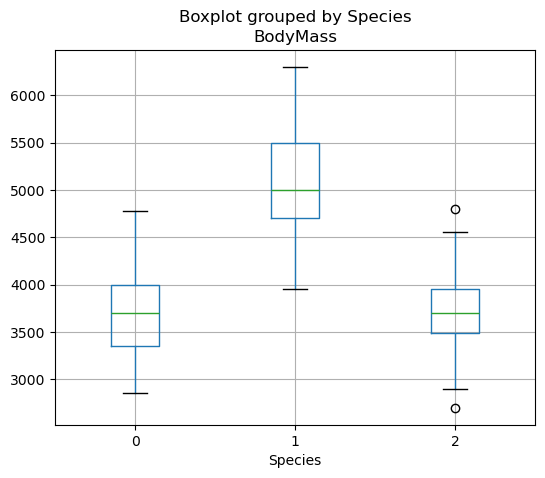

In [27]:
import matplotlib.pyplot as plt
for col in features:
    print(f'Unique values: {len(penguins[col].unique())}')
    penguins.boxplot(column=col, by='Species', figsize=(6,5))
    plt.title(col)
    plt.show()

In [28]:
print("Gatunek pingwina '1' wydaje się, że najbardziej różni się od dwóch pozostałych. Cechy '0' i '2' są w większości podobne poza 'CulmenLength'")

Gatunek pingwina '1' wydaje się, że najbardziej różni się od dwóch pozostałych. Cechy '0' i '2' są w większości podobne poza 'CulmenLength'


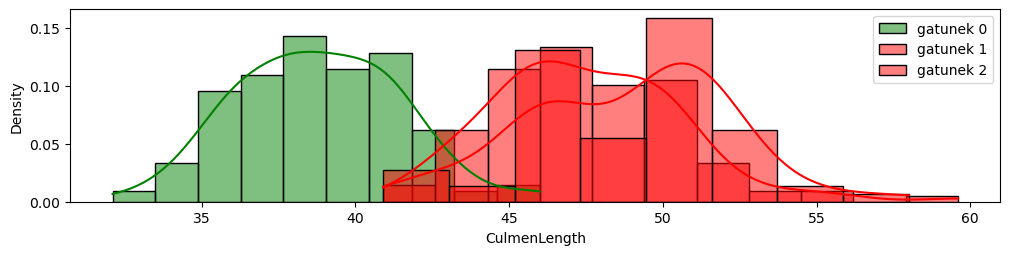

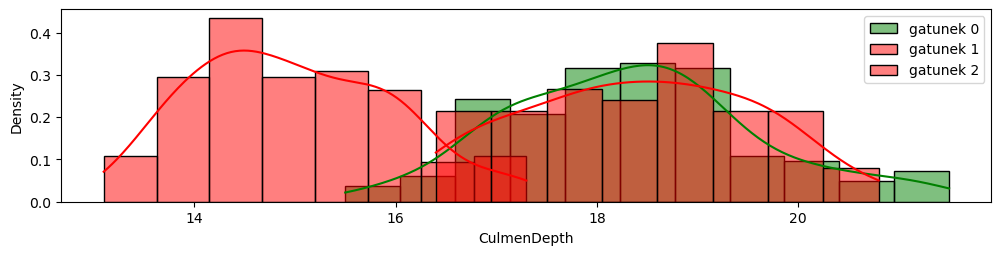

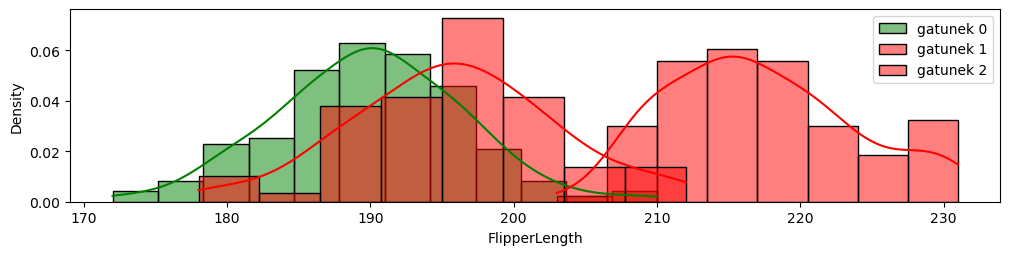

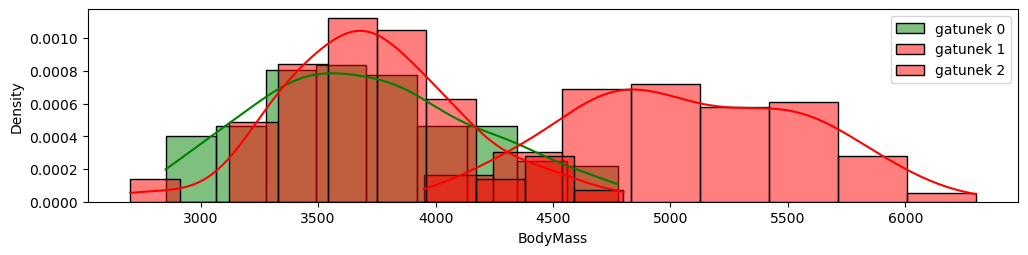

In [31]:
import seaborn as sns
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.histplot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='gatunek 0', stat="density", alpha=0.5)
    sns.histplot(penguins.loc[penguins['Species']==1, col], kde=True, color='red', label='gatunek 1', stat="density", alpha=0.5)
    sns.histplot(penguins.loc[penguins['Species']==2, col], kde=True, color='red', label='gatunek 2', stat="density", alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()

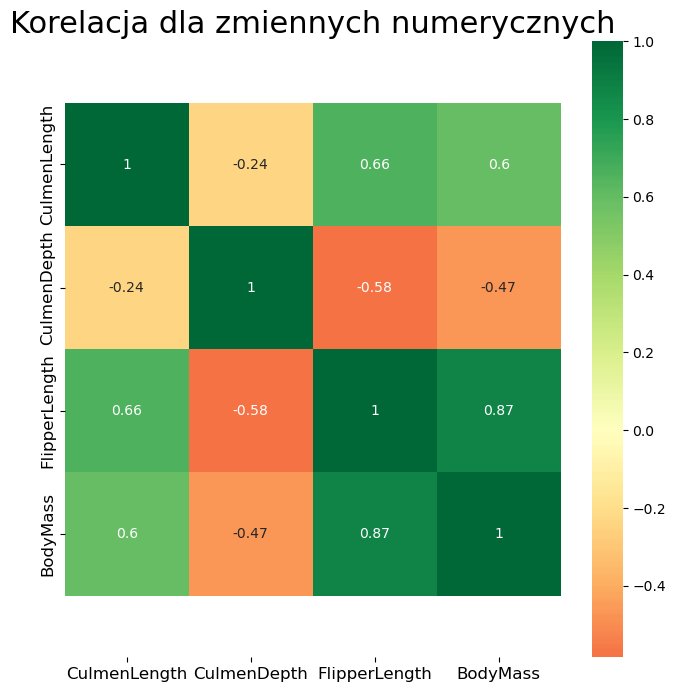

In [32]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [35]:
from scipy import stats

corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

CulmenLength     0.779857
FlipperLength    0.357472
BodyMass         0.209717
CulmenDepth     -0.183090
dtype: float64

In [37]:
print("Do terningu modelu weźmiemy cechy: CulmenLength oraz FlipperLength")

Do terningu modelu weźmiemy cechy: CulmenLength oraz FlipperLength


In [39]:
### Funkcje 

In [41]:
######################### Wizualizacja
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

In [43]:
# Metryki
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.preprocessing import label_binarize

metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    classes = np.unique(y_checked)
    y_binarized = label_binarize(y_checked, classes=classes)
    plt.clf() 
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for i in range(3):  # na sztywno dla 3 klas
        fpr, tpr, thresholds = roc_curve(y_binarized[:, i], predictions_proba[:, i])
        plt.plot(fpr, tpr, label=f"{name} - class {classes[i]}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions, average='weighted')
    auc_metric = roc_auc_score(y_checked, predictions_proba, multi_class='ovr')
    new_row = pd.DataFrame({'Model': [name], 'F1_score': [f1_metric], 'AUC': [auc_metric]})
    if metrics_dataframe.empty:
        metrics_dataframe = new_row
    else:
        metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)
    return metrics_dataframe

In [45]:
### Uczenie

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['CulmenLength', 'FlipperLength']], y, test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

Treningowe obserwacje: 239
Testowe obserwacje: 103


In [49]:
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

In [51]:
### Regresja logistyczna

In [53]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

LogisticRegression()

In [55]:
print(f"F1_score dla danych treningowych:", f1_score(y_train, model_lr.predict(X_train_standardized), average='weighted'))
print(f"F1_score dla danych testowych:", f1_score(y_test, model_lr.predict(X_test_standardized), average='weighted'))

F1_score dla danych treningowych: 0.95771759621132
F1_score dla danych testowych: 0.9606162937948501


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       1.00      1.00      1.00        37
           2       0.95      0.86      0.90        21

    accuracy                           0.96       103
   macro avg       0.96      0.94      0.95       103
weighted avg       0.96      0.96      0.96       103



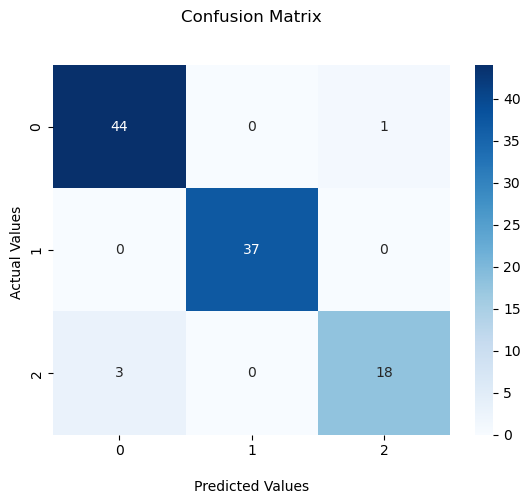

<Figure size 640x480 with 0 Axes>

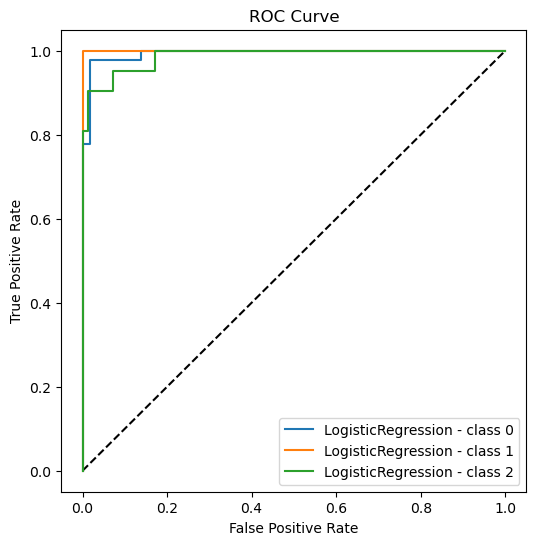

,Model,F1_score,AUC
0,LogisticRegression,0.960616,0.99357


In [57]:
calculate_metrics(model_lr, 'LogisticRegression', X_test_standardized, y_test)

In [59]:
### KNN

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'metric': 'euclidean', 'n_neighbors': 5}
F1_score dla danych treningowych: 0.9664163420749488
F1_score dla danych testowych: 0.9512199353014076
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       1.00      0.97      0.99        37
           2       0.90      0.86      0.88        21

    accuracy                           0.95       103
   macro avg       0.95      0.94      0.94       103
weighted avg       0.95      0.95      0.95       103



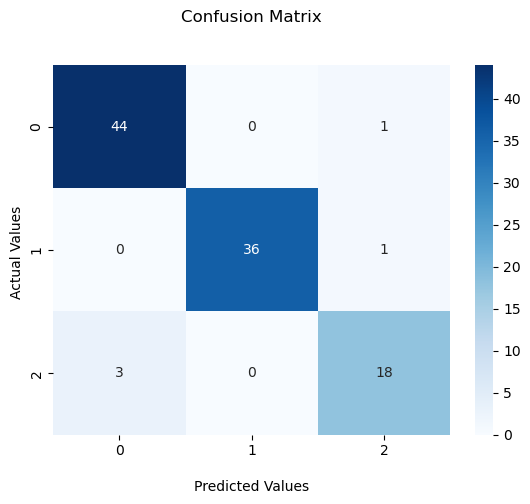

<Figure size 640x480 with 0 Axes>

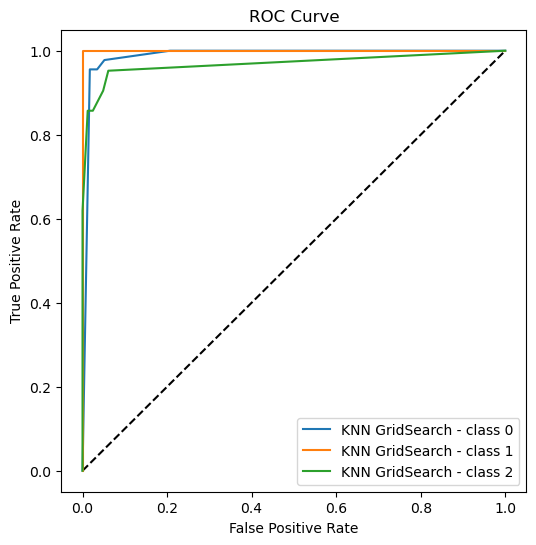

,Model,F1_score,AUC
0,LogisticRegression,0.960616,0.993570
1,KNN GridSearch,0.951220,0.985621


In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

random_KNN =  KNeighborsClassifier()
params_knn = {'n_neighbors': [1,5,10,20],
            'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
knn_gridsearch = GridSearchCV(random_KNN,
                             params_knn,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
knn_gridsearch.fit(X_train_standardized, y_train)
print('\nBest hyperparameter:', knn_gridsearch.best_params_)
knn_model_v2 = knn_gridsearch.best_estimator_

print(f"F1_score dla danych treningowych:", f1_score(y_train, knn_model_v2.predict(X_train_standardized), average='weighted'))
print(f"F1_score dla danych testowych:", f1_score(y_test, knn_model_v2.predict(X_test_standardized), average='weighted'))
calculate_metrics(knn_model_v2, 'KNN GridSearch', X_test_standardized, y_test)

In [63]:
### SVC

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'C': 100, 'kernel': 'linear'}
F1_score dla danych treningowych: 0.9664163420749488
F1_score dla danych testowych: 0.9511310380360818
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        45
           1       1.00      1.00      1.00        37
           2       0.90      0.86      0.88        21

    accuracy                           0.95       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.95      0.95      0.95       103



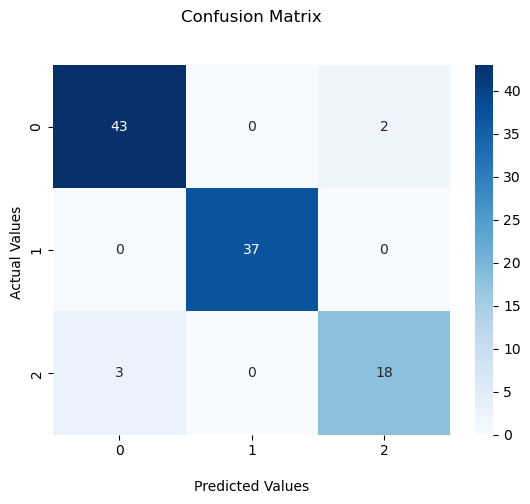

<Figure size 640x480 with 0 Axes>

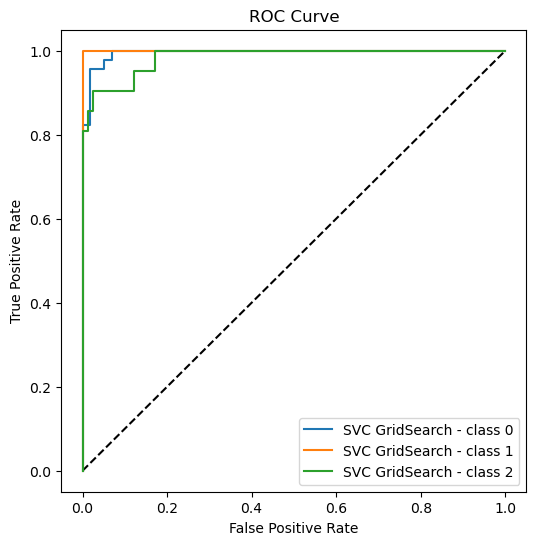

,Model,F1_score,AUC
0,LogisticRegression,0.960616,0.993570
1,KNN GridSearch,0.951220,0.985621
2,SVC GridSearch,0.951131,0.993113


In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

random_SVC =  SVC(probability=True)
params_SVC = {'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
SVC_gridsearch = GridSearchCV(random_SVC,
                             params_SVC,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
SVC_gridsearch.fit(X_train_standardized, y_train)
print('\nBest hyperparameter:', SVC_gridsearch.best_params_)
SVC_model_v2 = SVC_gridsearch.best_estimator_

print(f"F1_score dla danych treningowych:", f1_score(y_train, SVC_model_v2.predict(X_train_standardized), average='weighted'))
print(f"F1_score dla danych testowych:", f1_score(y_test, SVC_model_v2.predict(X_test_standardized), average='weighted'))
calculate_metrics(SVC_model_v2, 'SVC GridSearch', X_test_standardized, y_test)

In [67]:
### Ensemblig - LogisticRegression, KNN, SVC

F1_score dla danych treningowych: 0.9620754476318326
F1_score dla danych testowych: 0.9606162937948501
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       1.00      1.00      1.00        37
           2       0.95      0.86      0.90        21

    accuracy                           0.96       103
   macro avg       0.96      0.94      0.95       103
weighted avg       0.96      0.96      0.96       103



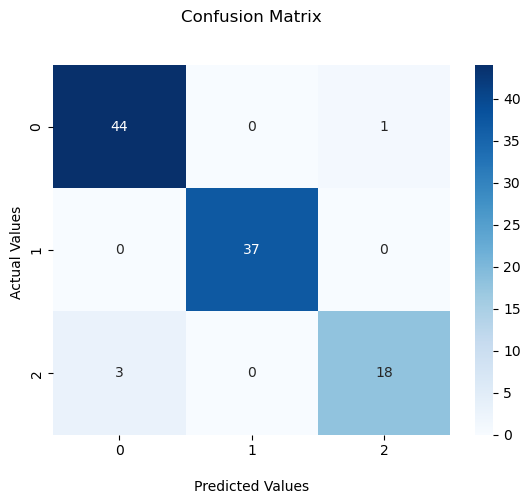

<Figure size 640x480 with 0 Axes>

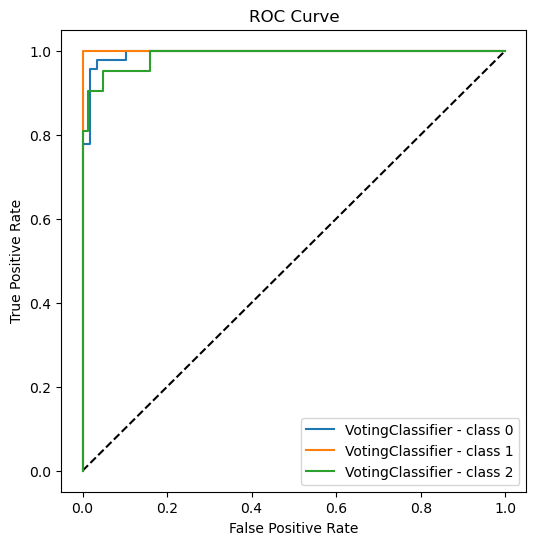

,Model,F1_score,AUC
0,LogisticRegression,0.960616,0.993570
1,KNN GridSearch,0.951220,0.985621
2,SVC GridSearch,0.951131,0.993113
3,VotingClassifier,0.960616,0.994279


In [69]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(estimators=[('LogisticRegression', model_lr),
                                            ('KNN', knn_model_v2),
                                            ('SVC', SVC_model_v2)],
                                            voting='soft')

model_voting.fit(X_train_standardized, y_train)
print(f"F1_score dla danych treningowych:", f1_score(y_train, model_voting.predict(X_train_standardized), average='weighted'))
print(f"F1_score dla danych testowych:", f1_score(y_test, model_voting.predict(X_test_standardized), average='weighted'))
calculate_metrics(model_voting, 'VotingClassifier', X_test_standardized, y_test)

In [71]:
### DecisionTree

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best hyperparameter: {'max_depth': 20, 'min_samples_leaf': 1}
F1_score dla danych treningowych: 1.0
F1_score dla danych testowych: 0.9317233158238254
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        45
           1       1.00      0.95      0.97        37
           2       0.85      0.81      0.83        21

    accuracy                           0.93       103
   macro avg       0.92      0.91      0.92       103
weighted avg       0.93      0.93      0.93       103



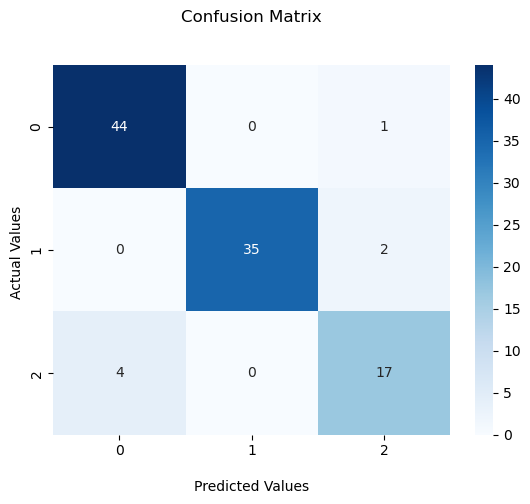

<Figure size 640x480 with 0 Axes>

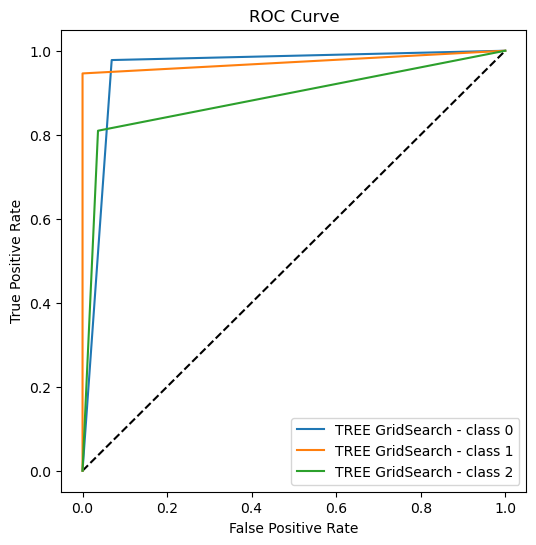

,Model,F1_score,AUC
0,LogisticRegression,0.960616,0.993570
1,KNN GridSearch,0.951220,0.985621
2,SVC GridSearch,0.951131,0.993113
3,VotingClassifier,0.960616,0.994279
4,TREE GridSearch,0.931723,0.937949


In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

random_tree =  DecisionTreeClassifier()
params_tree = {'max_depth': [2,5,10,20],
            'min_samples_leaf': [1,2,5,10,20]}
tree_gridsearch = GridSearchCV(random_tree,
                             params_tree,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
tree_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', tree_gridsearch.best_params_)
tree_model_v2 = tree_gridsearch.best_estimator_

print(f"F1_score dla danych treningowych:", f1_score(y_train, tree_model_v2.predict(X_train), average='weighted'))
print(f"F1_score dla danych testowych:", f1_score(y_test, tree_model_v2.predict(X_test), average='weighted'))
calculate_metrics(tree_model_v2, 'TREE GridSearch', X_test, y_test)

In [75]:
### RandomForest

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 5, 'min_samples_leaf': 3}
F1_score dla danych treningowych: 0.975004994284319
F1_score dla danych testowych: 0.9612585844797575
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      0.97      0.99        37
           2       0.90      0.90      0.90        21

    accuracy                           0.96       103
   macro avg       0.95      0.95      0.95       103
weighted avg       0.96      0.96      0.96       103



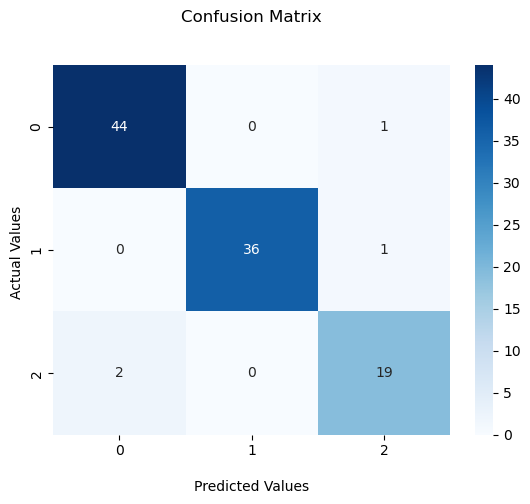

<Figure size 640x480 with 0 Axes>

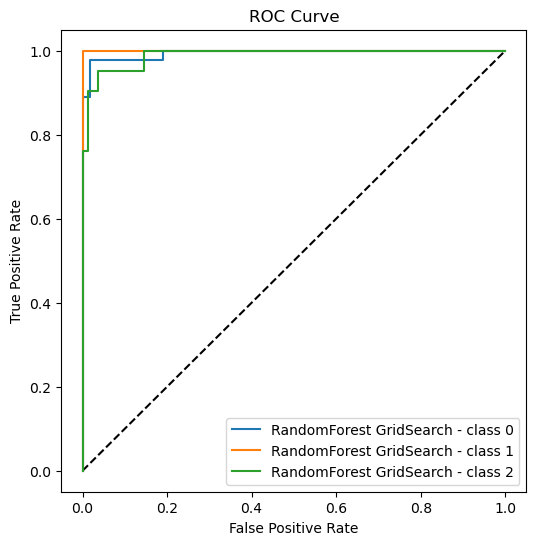

,Model,F1_score,AUC
0,LogisticRegression,0.960616,0.993570
1,KNN GridSearch,0.951220,0.985621
2,SVC GridSearch,0.951131,0.993113
3,VotingClassifier,0.960616,0.994279
4,TREE GridSearch,0.931723,0.937949
5,RandomForest GridSearch,0.961259,0.994600


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_rf = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
rf_gridsearch = GridSearchCV(random_forest,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model_v2 = rf_gridsearch.best_estimator_

print(f"F1_score dla danych treningowych:", f1_score(y_train, rf_model_v2.predict(X_train), average='weighted'))
print(f"F1_score dla danych testowych:", f1_score(y_test, rf_model_v2.predict(X_test), average='weighted'))
calculate_metrics(rf_model_v2, 'RandomForest GridSearch', X_test, y_test)

In [79]:
### AdaBoost

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'estimator__max_depth': 3, 'n_estimators': 10}
F1_score dla danych treningowych: 1.0
F1_score dla danych testowych: 0.9519111191610626
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      0.95      0.97        37
           2       0.86      0.90      0.88        21

    accuracy                           0.95       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.95      0.95      0.95       103



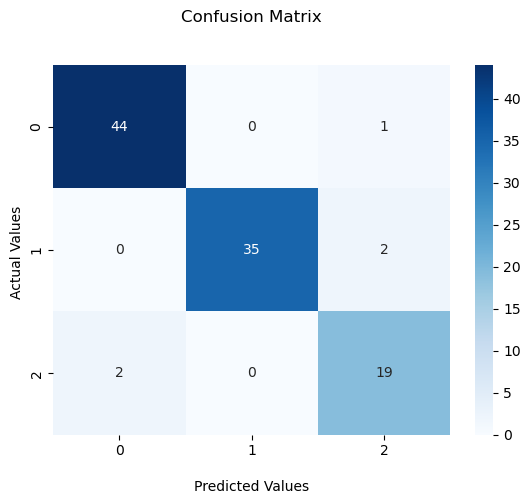

<Figure size 640x480 with 0 Axes>

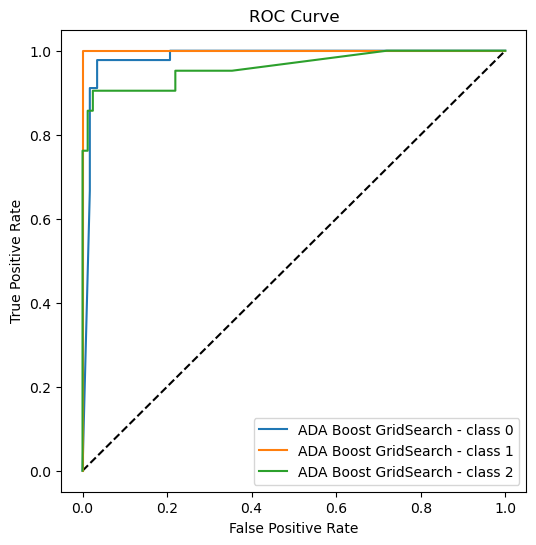

,Model,F1_score,AUC
0,LogisticRegression,0.960616,0.993570
1,KNN GridSearch,0.951220,0.985621
2,SVC GridSearch,0.951131,0.993113
3,VotingClassifier,0.960616,0.994279
4,TREE GridSearch,0.931723,0.937949
5,RandomForest GridSearch,0.961259,0.994600
6,ADA Boost GridSearch,0.951911,0.981605


In [81]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

random_adaboost =  AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), algorithm='SAMME')
params_adaboost = {'n_estimators': [1,10,100,1000],
            'estimator__max_depth': [1,3,5,10]}
adaboost_gridsearch = GridSearchCV(random_adaboost,
                             params_adaboost,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
adaboost_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', adaboost_gridsearch.best_params_)
adaboost_model_v2 = adaboost_gridsearch.best_estimator_

print(f"F1_score dla danych treningowych:", f1_score(y_train, adaboost_model_v2.predict(X_train), average='weighted'))
print(f"F1_score dla danych testowych:", f1_score(y_test, adaboost_model_v2.predict(X_test), average='weighted'))
calculate_metrics(adaboost_model_v2, 'ADA Boost GridSearch', X_test, y_test)

In [83]:
### Esembling - DecisionTree, RandomForest, AdaBoost

Fitting 5 folds for each of 16 candidates, totalling 80 fits
F1_score dla danych treningowych: 1.0
F1_score dla danych testowych: 0.9317233158238254
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        45
           1       1.00      0.95      0.97        37
           2       0.85      0.81      0.83        21

    accuracy                           0.93       103
   macro avg       0.92      0.91      0.92       103
weighted avg       0.93      0.93      0.93       103



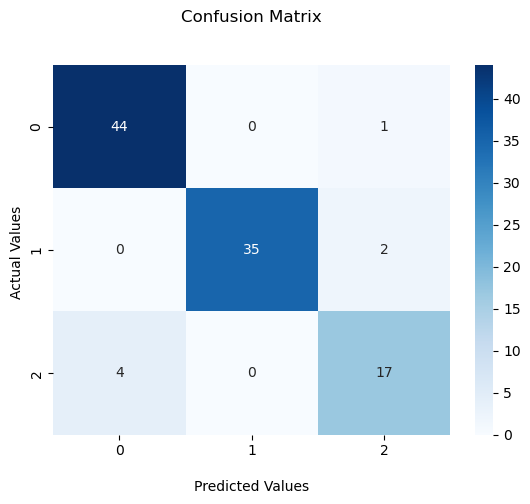

<Figure size 640x480 with 0 Axes>

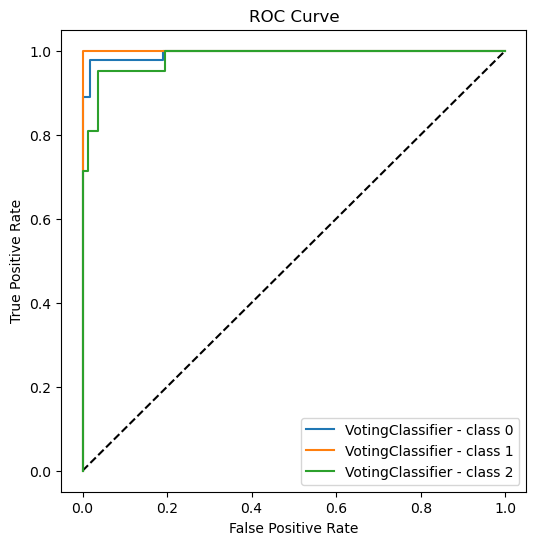

,Model,F1_score,AUC
0,LogisticRegression,0.960616,0.993570
1,KNN GridSearch,0.951220,0.985621
2,SVC GridSearch,0.951131,0.993113
3,VotingClassifier,0.960616,0.994279
4,TREE GridSearch,0.931723,0.937949
5,RandomForest GridSearch,0.961259,0.994600
6,ADA Boost GridSearch,0.951911,0.981605
7,VotingClassifier,0.931723,0.992858


In [85]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(estimators=[('DecusionTree', tree_model_v2),
                                            ('RandomForest', rf_gridsearch),
                                            ('AdaBoost', adaboost_model_v2)],
                                            voting='soft')

model_voting.fit(X_train, y_train)
print(f"F1_score dla danych treningowych:", f1_score(y_train, model_voting.predict(X_train), average='weighted'))
print(f"F1_score dla danych testowych:", f1_score(y_test, model_voting.predict(X_test), average='weighted'))
calculate_metrics(model_voting, 'VotingClassifier', X_test, y_test)